<a href="https://colab.research.google.com/github/Dhanasree281/data_analysis_projects/blob/main/DDS_Regional_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### problem statement
  DDS company's 2014-2018 sales data to identify key revenue and profit drivers across product, channels, and regions ,uncover seasonal trends and outliners, and align performance against. Use these insights to optimize pricing,promotions and market expansion for sustainable growth and reduce concentration risk.  

# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
sheets=pd.read_excel('/content/Regional Sales Dataset.xlsx',sheet_name=None)


In [ ]:
# assign dataframes to each sheet
df_sales=sheets['Sales Orders']
df_Customers=sheets['Customers']
df_Products=sheets['Products']
df_Regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_sales.shape

(64104, 12)

In [ ]:
print(f"df_sales shape: {df_sales.shape}")

df_sales shape: (64104, 12)


In [ ]:
df_sales=sheets['Sales Orders']
df_Customers=sheets['Customers']
df_Products=sheets['Products']
df_Regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']

In [ ]:
print(f"df_sales shape: {df_sales.shape}")
print(f"df_Customers: {df_Customers.shape}")
print(f"df_Products: {df_Products.shape}")
print(f"df_Regions: {df_Regions.shape}")
print(f"df_state_reg: {df_state_reg.shape}")
print(f"df_budgets: {df_budgets.shape}")

df_sales shape: (64104, 12)
df_Customers: (175, 2)
df_Products: (30, 2)
df_Regions: (994, 15)
df_state_reg: (49, 3)
df_budgets: (30, 2)


In [ ]:
df_Customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


Data cleaning and wrangling


In [ ]:
#Merge with customers
df=df_sales.merge(df_Customers,
                  how='left',left_on='Customer Name Index',right_on='Customer Index')


In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
#Merge with products
df=df_sales.merge(df_Products,
                  how='left',left_on='Product Description Index',right_on='Index')

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,8,Product 8


In [ ]:
#Merge with Regions
#Merge with customers
df=df.merge(df_Regions,
                  how='left',left_on='Delivery Region Index',right_on='id')

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
#Merge with State Regions
df=df.merge(
    df_state_reg[["State Code", "Region"]],
                  how='left',
                  left_on='state_code',
                  right_on='State Code'
    )

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
df=df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [ ]:
df.to_csv('file.csv')
display(df.head())

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [ ]:
cols_to_drop=['Index','id','state_code']
df=df.drop(columns=cols_to_drop,errors='ignore')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [ ]:
#convert all columns to lower case for consistency
df.columns=df.columns.str.lower()
df.columns.values

array(['order_number', 'order_date', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order_quantity', 'unit_price',
       'line_total', 'cost', 'product_name', 'name', 'county',
       'state_name', 'type', 'lat', 'lon', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area',
       'time_zone', 'state code', 'region', '2017 budgets', ' 2017budget',
       ' budget', 'budget'], dtype=object)

In [ ]:
cols_to_keep=[
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'order quantity',
    'unit price',
    'Line Total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'longitude',
    'latitude',
    '2017 Budgets'

]

In [ ]:
df.head(5)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,median_income,land_area,water_area,time_zone,state code,region,2017 budgets,2017budget,budget,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,36466,268318796,13908113,America/New York,GA,South,964940.231,<NA>,<NA>,<NA>
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120,<NA>,<NA>,<NA>
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270,<NA>,<NA>,<NA>
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555,<NA>,<NA>,<NA>
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,63158,70972793,720300,America/New York,CT,Northeast,1085037.329,<NA>,<NA>,<NA>


In [ ]:
df=df.rename(columns={
   'ordernumber':'order_number',
   'orderdate':'order_date',
   'customer names':'customer_names',
   'channel':'channel',
   'product name':'product_name',
   'order quantity':'order_quantity',
   'unit price':'unit_price',
   'Line Total':'revenue',
   'total unit cost':'cost',
  'state_code':'state',
   'state':'state_name',
  'longitude':'lon',
  'latitude':'lat',
  '2017 Budgets':'budget'

})

In [ ]:
df = df.rename(columns={
    'line_total': 'revenue',
    '2017_budgets': 'budget_2017'
})

print(df.columns.tolist())  # check after renaming
print(df[['order_date', 'product_name', 'revenue', 'budget_2017']].head())


['order_number', 'order_date', 'customer_name_index', 'channel', 'currency_code', 'warehouse_code', 'delivery_region_index', 'product_description_index', 'order_quantity', 'unit_price', 'revenue', 'cost', 'product_name', 'name', 'county', 'state_name', 'type', 'lat', 'lon', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'state_code', 'region', 'budget_2017', '2017budget', 'budget', 'budget']
  order_date product_name  revenue  budget_2017
0 2014-01-01   Product 27  14994.6   964940.231
1 2014-01-01   Product 20  25868.7  2067108.120
2 2014-01-01   Product 26   5869.2  5685138.270
3 2014-01-01    Product 7  16368.1   889737.555
4 2014-01-01    Product 8  18331.2  1085037.329


In [ ]:
print(df.columns.tolist())  # check after renaming
print(df[['order_date', 'product_name', 'revenue', 'budget_2017']].tail())

['order_number', 'order_date', 'customer_name_index', 'channel', 'currency_code', 'warehouse_code', 'delivery_region_index', 'product_description_index', 'order_quantity', 'unit_price', 'revenue', 'cost', 'product_name', 'name', 'county', 'state_name', 'type', 'lat', 'lon', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'state_code', 'region', 'budget_2017', '2017budget', 'budget', 'budget', 'line_cost', 'total_cost', 'profit', 'profit_margin_pct', 'order_month']
      order_date product_name  revenue  budget_2017
64099 2018-02-28   Product 26  21788.4  5685138.270
64100 2018-02-28   Product 21   5185.8   959899.218
64101 2018-02-28   Product 13  43483.0  3720639.645
64102 2018-02-28   Product 20  27717.9  2067108.120
64103 2018-02-28   Product 15   7986.4  3299478.315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_number               64104 non-null  object        
 1   order_date                 64104 non-null  datetime64[ns]
 2   customer_name_index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   currency_code              64104 non-null  object        
 5   warehouse_code             64104 non-null  object        
 6   delivery_region_index      64104 non-null  int64         
 7   product_description_index  64104 non-null  int64         
 8   order_quantity             64104 non-null  int64         
 9   unit_price                 64104 non-null  float64       
 10  revenue                    64104 non-null  float64       
 11  cost                       64104 non-null  float64       
 12  prod

In [ ]:
df_2017=df[df['order_date'].dt.year==2017]

In [ ]:
df.head(5)

,order_number,order_date,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,...,median_income,land_area,water_area,time_zone,state_code,region,budget_2017,2017budget,budget,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,36466,268318796,13908113,America/New York,GA,South,964940.231,<NA>,<NA>,<NA>
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120,<NA>,<NA>,<NA>
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270,<NA>,<NA>,<NA>
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555,<NA>,<NA>,<NA>
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,63158,70972793,720300,America/New York,CT,Northeast,1085037.329,<NA>,<NA>,<NA>


In [ ]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name_index,0
channel,0
currency_code,0
warehouse_code,0
delivery_region_index,0
product_description_index,0
order_quantity,0
unit_price,0


### ***Featuring Engineering***


In [ ]:
df.head(5)

,order_number,order_date,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,...,median_income,land_area,water_area,time_zone,state_code,region,budget_2017,2017budget,budget,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,36466,268318796,13908113,America/New York,GA,South,964940.231,<NA>,<NA>,<NA>
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120,<NA>,<NA>,<NA>
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270,<NA>,<NA>,<NA>
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555,<NA>,<NA>,<NA>
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,63158,70972793,720300,America/New York,CT,Northeast,1085037.329,<NA>,<NA>,<NA>


In [ ]:
# Make sure column names are consistent
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Ensure revenue column exists
if "line_total" in df.columns:
    df = df.rename(columns={"line_total": "revenue"})

# Calculate revenue
revenue = df['revenue'].sum()

# Calculate total cost
df['line_cost'] = df['order_quantity'] * df['cost']
total_cost = df['line_cost'].sum()

# Profit
profit = revenue - total_cost

# Print
print(f"Total Revenue: ${revenue:,.2f}")
print(f"Total Cost: ${total_cost:,.2f}")
print(f"Profit: ${profit:,.2f}")



Total Revenue: $1,235,968,899.00
Total Cost: $774,196,339.08
Profit: $461,772,559.92


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())


['order_number', 'order_date', 'customer_name_index', 'channel', 'currency_code', 'warehouse_code', 'delivery_region_index', 'product_description_index', 'order_quantity', 'unit_price', 'line_total', 'cost', 'product_name', 'name', 'county', 'state_name', 'type', 'lat', 'lon', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'state_code', 'region', '2017_budgets', '2017budget', 'budget', 'budget']


In [ ]:
df[['order_date','product_name','line_total','budget']].head()



,order_date,product_name,line_total,budget,budget
0,2014-01-01,Product 27,14994.6,<NA>,<NA>
1,2014-01-01,Product 20,25868.7,<NA>,<NA>
2,2014-01-01,Product 26,5869.2,<NA>,<NA>
3,2014-01-01,Product 7,16368.1,<NA>,<NA>
4,2014-01-01,Product 8,18331.2,<NA>,<NA>


In [ ]:
print(df.columns.tolist())


['order_number', 'order_date', 'customer name index', 'channel', 'currency code', 'warehouse code', 'delivery region index', 'product description index', 'order_quantity', 'unit_price', 'line_total', 'cost', 'product_name', 'name', 'county', 'state_name', 'type', 'lat', 'lon', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'state code', 'region', '2017 budgets', ' 2017budget', ' budget', 'budget']


In [ ]:
df['total_cost']=df['order_quantity']*df['cost']

In [ ]:
df['profit']=df['revenue']-df['total_cost']
df['profit_margin_pct']=df['profit']/df['revenue']*100

In [ ]:
df.head(5)

,order_number,order_date,customer_name_index,channel,currency_code,warehouse_code,delivery_region_index,product_description_index,order_quantity,unit_price,...,state_code,region,budget_2017,2017budget,budget,budget,line_cost,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,GA,South,964940.231,<NA>,<NA>,<NA>,10946.058,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,IN,Midwest,2067108.120,<NA>,<NA>,<NA>,13969.098,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,CA,West,5685138.270,<NA>,<NA>,<NA>,4108.440,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,IN,Midwest,889737.555,<NA>,<NA>,<NA>,7201.964,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,CT,Northeast,1085037.329,<NA>,<NA>,<NA>,10082.160,10082.160,8249.040,45.0


**EDA**

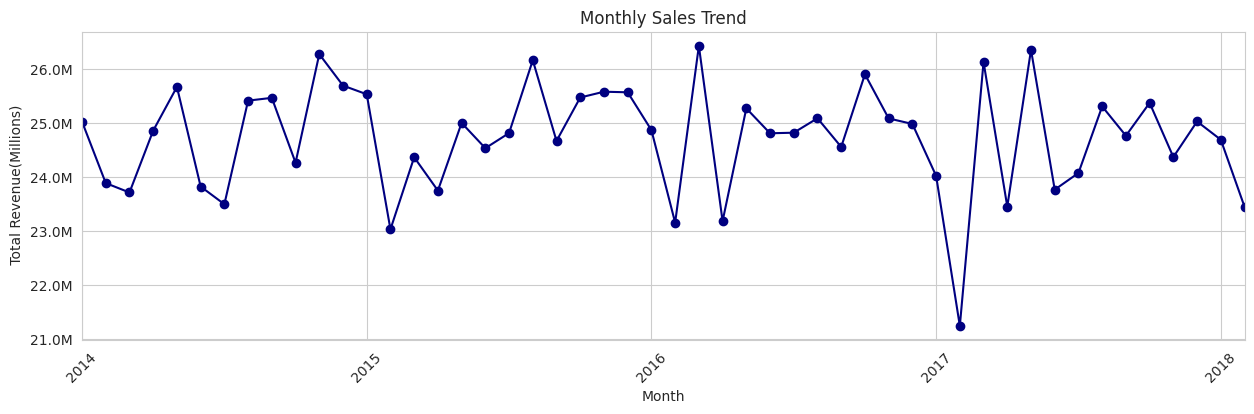

In [ ]:

df['order_month']=df['order_date'].dt.to_period('M')
monthly_sales=df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o',color='navy')
from matplotlib.ticker import FuncFormatter
FuncFormatter=FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(FuncFormatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel(' Total Revenue(Millions)')
plt.xticks(rotation=45)
plt.show()

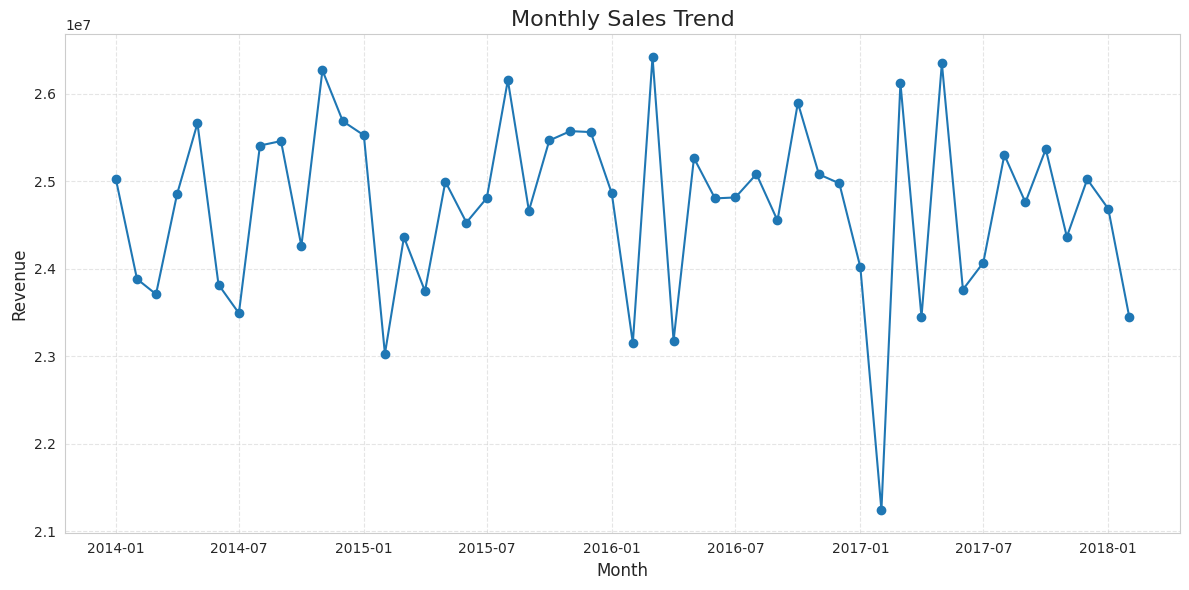

In [ ]:


# ✅ Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# ✅ Extract Year-Month (e.g. 2014-01, 2014-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# ✅ Group by month and sum revenue
monthly_sales = df.groupby('order_month')['revenue'].sum().reset_index()

# ✅ Convert period to datetime for plotting
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

# ✅ Plot line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['order_month'], monthly_sales['revenue'], marker='o')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# ✅ Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# ✅ Remove rows where year=2018 and month is Jan (1) or Feb (2)
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]
# print("Record after removing january and february 2018: ")
# print(df_new['order_date'].dt.to_period('M').value_counts().sort_index())


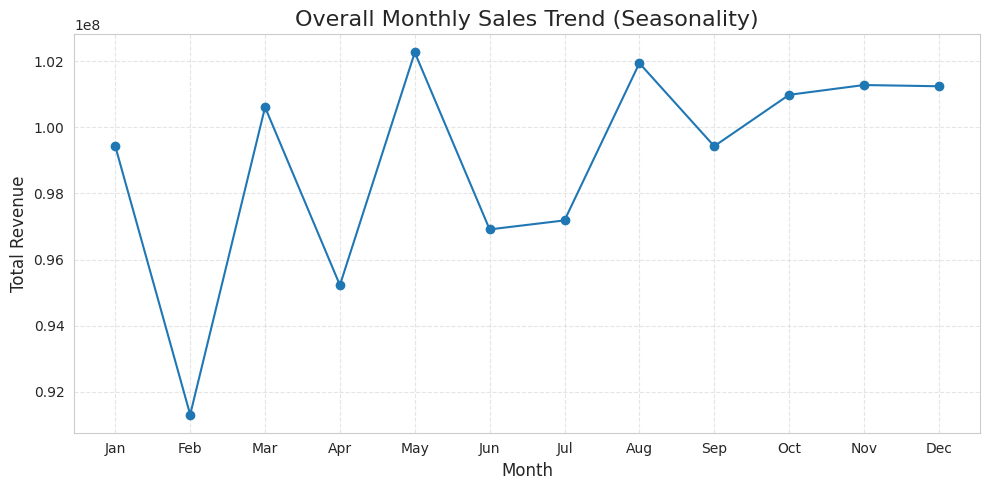

In [ ]:
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# ✅ Extract calendar month (1–12) and month name
df_new['month'] = df_new['order_date'].dt.month
df_new['month_name'] = df_new['order_date'].dt.strftime('%b')

# ✅ Group by month across all years
seasonal_sales = df.groupby(['month', 'month_name'])['revenue'].sum().reset_index()

# ✅ Sort by month number
seasonal_sales = seasonal_sales.sort_values('month')

# ✅ Plot
plt.figure(figsize=(10,5))
plt.plot(seasonal_sales['month_name'], seasonal_sales['revenue'], marker='o')
plt.title("Overall Monthly Sales Trend (Seasonality)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

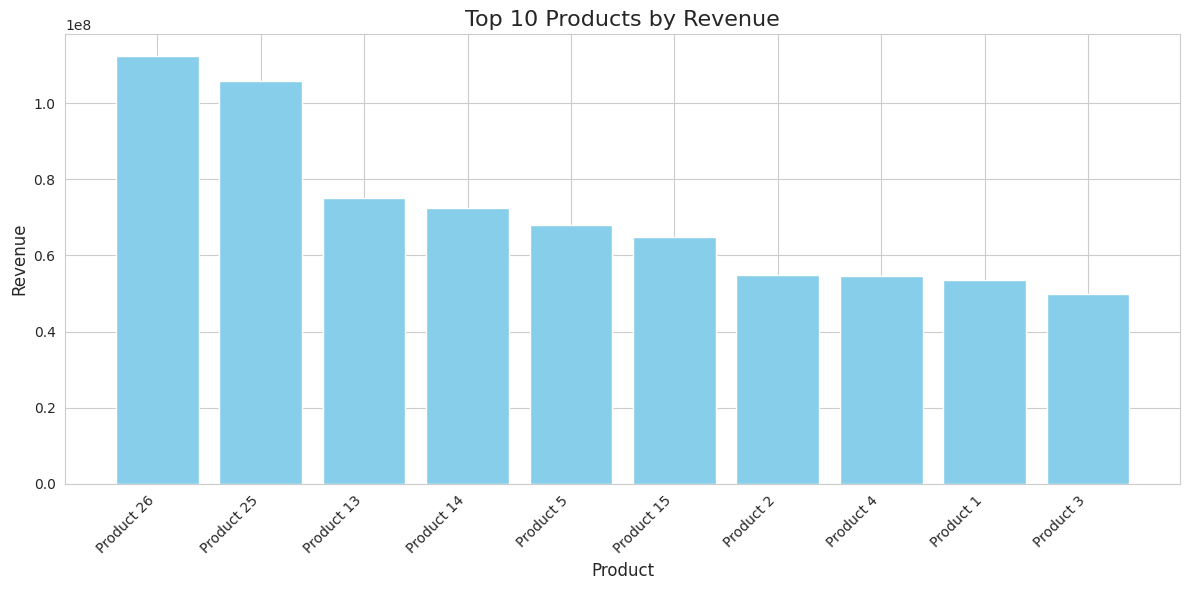

In [ ]:


# ✅ Group by product_name and sum revenue
product_sales = df_new.groupby('product_name')['revenue'].sum().reset_index()

# ✅ Sort by revenue and take top 10
top_products = product_sales.sort_values(by='revenue', ascending=False).head(10)

# ✅ Plot bar chart
plt.figure(figsize=(12,6))
plt.bar(top_products['product_name'], top_products['revenue'], color='skyblue')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-165005440.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_name', y='revenue', palette='Blues_r')


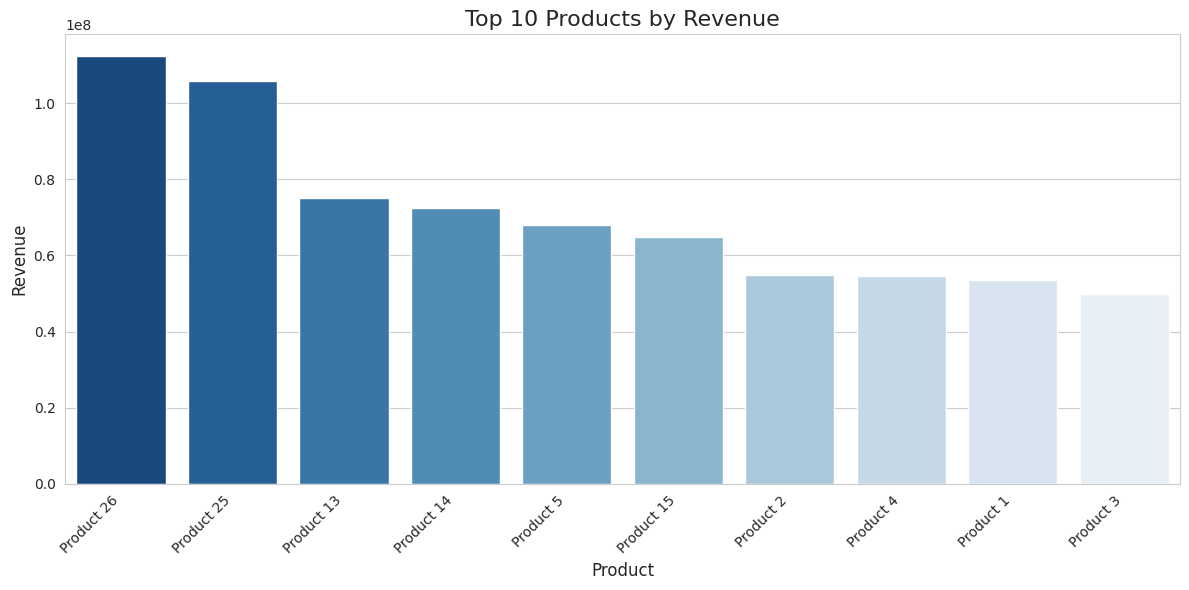

In [ ]:


# ✅ Group by product_name and sum revenue
product_sales = df_new.groupby('product_name')['revenue'].sum().reset_index()

# ✅ Sort by revenue and take top 10
top_products = product_sales.sort_values(by='revenue', ascending=False).head(10)

# ✅ Plot bar chart with seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='product_name', y='revenue', palette='Blues_r')

plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4099907073.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_products, y='product_name', x='revenue', palette='Blues_r')


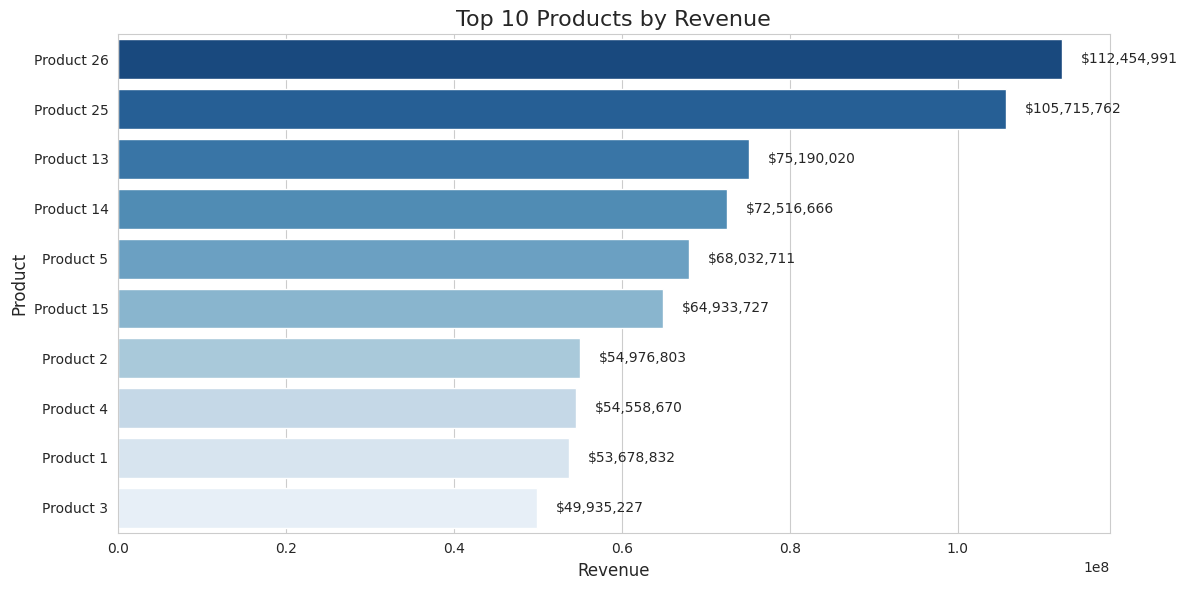

In [ ]:


# ✅ Group by product_name and sum revenue
product_sales = df.groupby('product_name')['revenue'].sum().reset_index()

# ✅ Sort by revenue and take top 10
top_products = product_sales.sort_values(by='revenue', ascending=False).head(10)

# ✅ Plot horizontal bar chart for readability
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_products, y='product_name', x='revenue', palette='Blues_r')

# ✅ Add revenue labels on each bar
for i, v in enumerate(top_products['revenue']):
    ax.text(v + 0.02 * top_products['revenue'].max(), i, f"${v:,.0f}", va='center')

plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3036422275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom_products, y='product_name', x='revenue', palette='Reds_r')


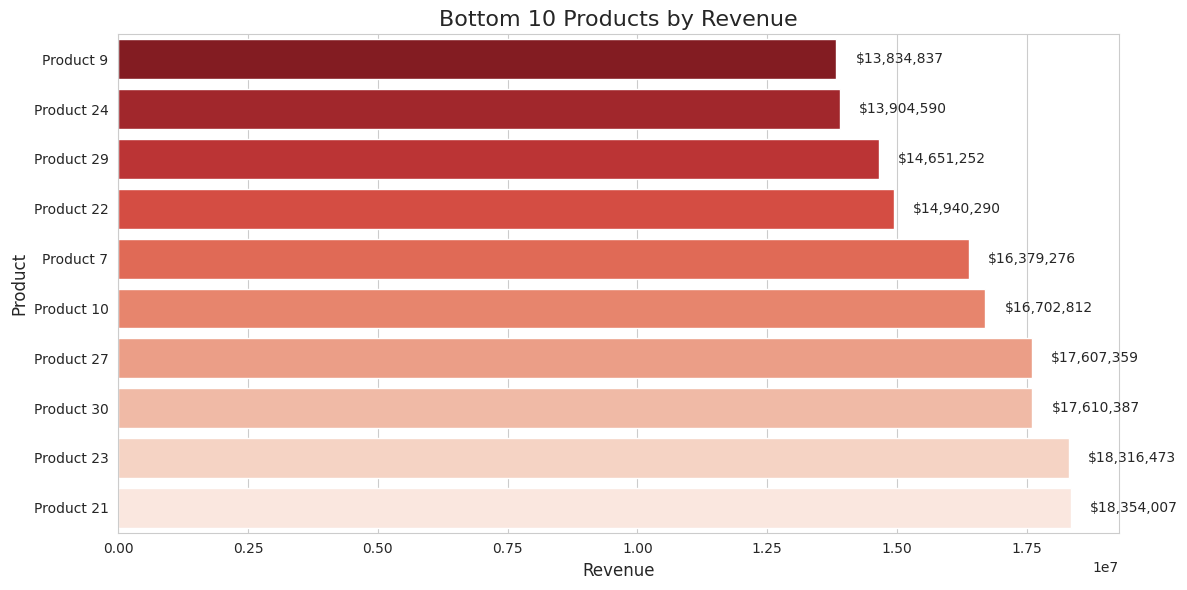

In [ ]:


# ✅ Group by product_name and sum revenue
product_sales = df.groupby('product_name')['revenue'].sum().reset_index()

# ✅ Sort by revenue (ascending) and take bottom 10
bottom_products = product_sales.sort_values(by='revenue', ascending=True).head(10)

# ✅ Plot horizontal bar chart for readability
plt.figure(figsize=(12,6))
ax = sns.barplot(data=bottom_products, y='product_name', x='revenue', palette='Reds_r')

# ✅ Add revenue labels on each bar
for i, v in enumerate(bottom_products['revenue']):
    ax.text(v + 0.02 * bottom_products['revenue'].max(), i, f"${v:,.0f}", va='center')

plt.title("Bottom 10 Products by Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()
plt.show()


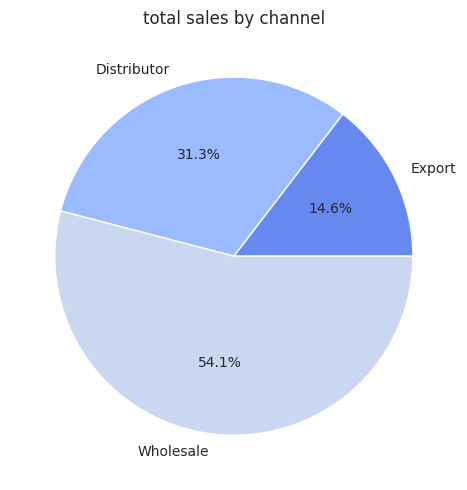

In [ ]:
chan_sales=df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(5,5))
plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title('total sales by channel')
plt.tight_layout()
plt.show()

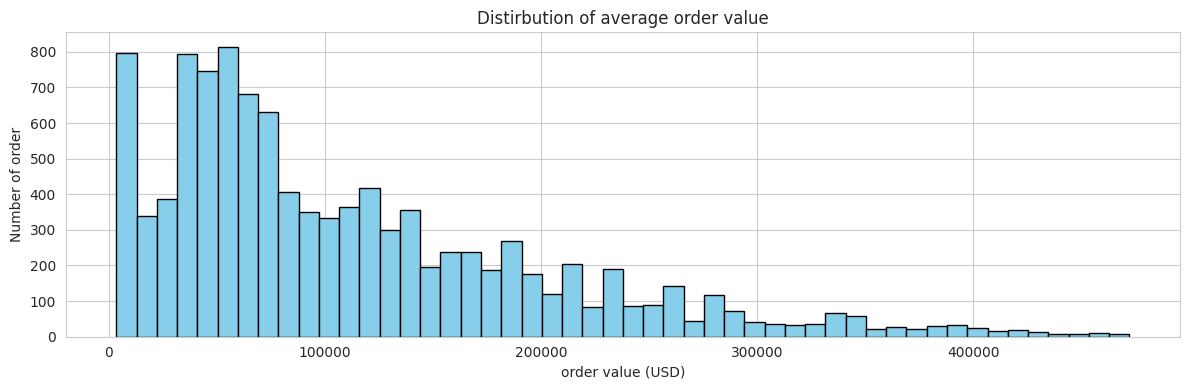

In [ ]:
### Average order values (AVO) Distribution
aov=df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)
plt.title('Distirbution of average order value')
plt.xlabel('order value (USD)')
plt.ylabel('Number of order')
plt.tight_layout()
plt.show()

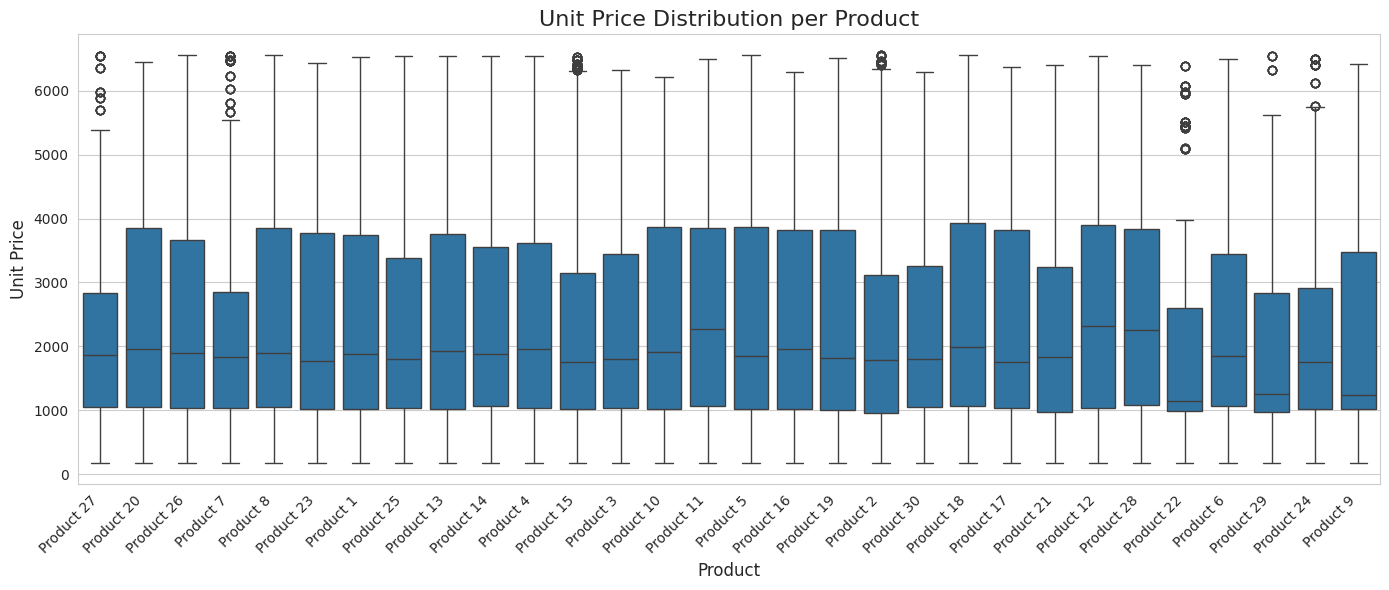

In [ ]:
#unit price distribution


plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="product_name", y="unit_price")

plt.title("Unit Price Distribution per Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Unit Price", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


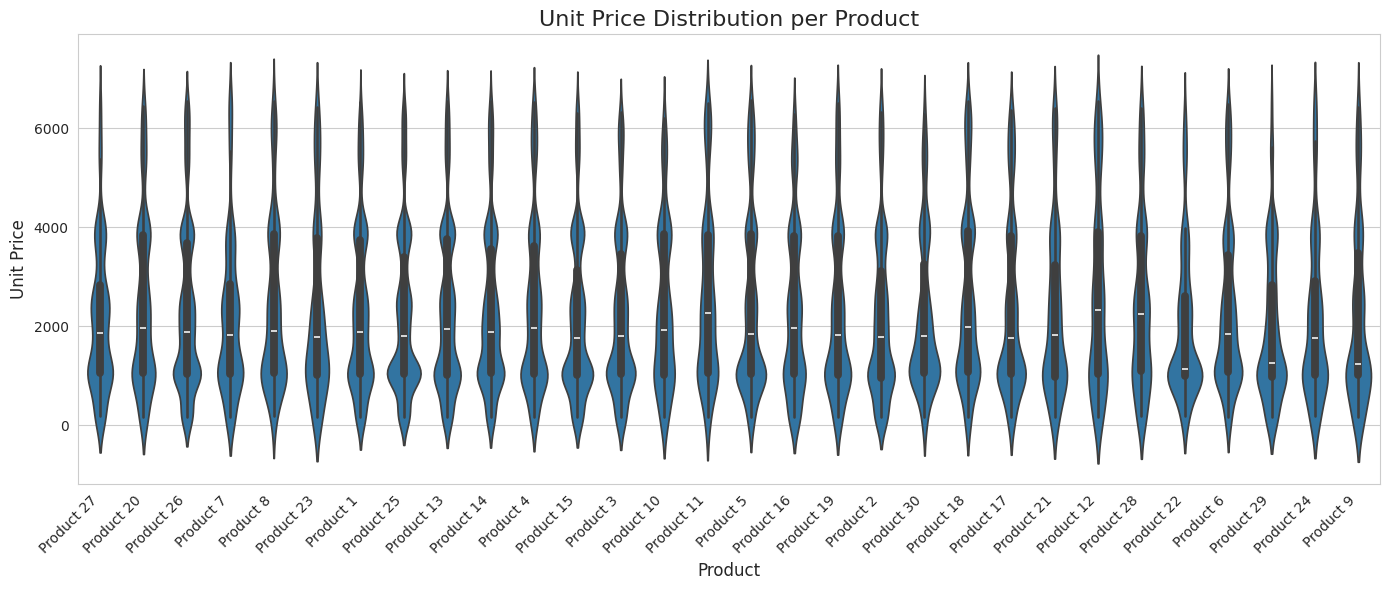

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x="product_name", y="unit_price", inner="box")

plt.title("Unit Price Distribution per Product", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Unit Price", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#top 10 states by revenue and order count
#avg profit marging and channel
#top and bottom 10 customers by revenue
#customer segmentation :revenue vs profit margin
#correlation heatmap

/tmp/ipython-input-849872303.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_states, x="state_name", y="revenue", palette="Blues_d")


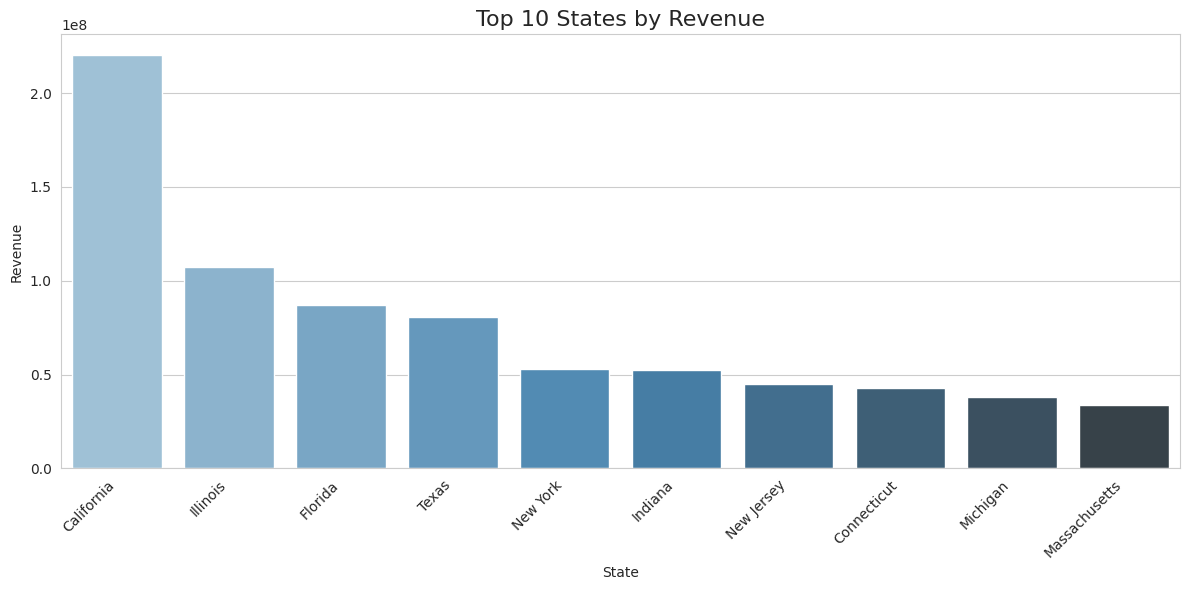

/tmp/ipython-input-849872303.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_states, x="state_name", y="order_count", palette="Greens_d")


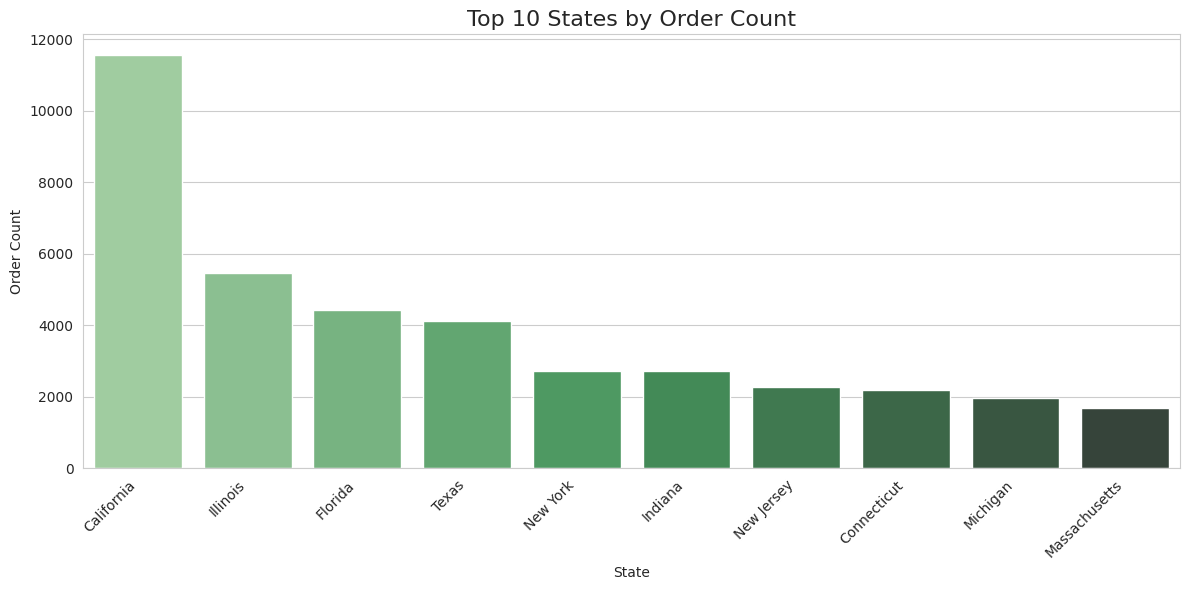

In [ ]:


# Group by state and calculate total revenue + order count
state_stats = (
    df.groupby("state_name")
      .agg(revenue=("revenue", "sum"),
           order_count=("order_number", "count"))
      .reset_index()
)

# Sort by revenue and take top 10
top10_states = state_stats.sort_values("revenue", ascending=False).head(10)

# Plot: Revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_states, x="state_name", y="revenue", palette="Blues_d")
plt.title("Top 10 States by Revenue", fontsize=16)
plt.xlabel("State")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot: Order Count
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_states, x="state_name", y="order_count", palette="Greens_d")
plt.title("Top 10 States by Order Count", fontsize=16)
plt.xlabel("State")
plt.ylabel("Order Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


       channel  profit_margin_pct
1       Export          37.937828
0  Distributor          37.550049
2    Wholesale          37.114482


/tmp/ipython-input-3989886404.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_profit_margin, x="channel", y="profit_margin_pct", palette="viridis")


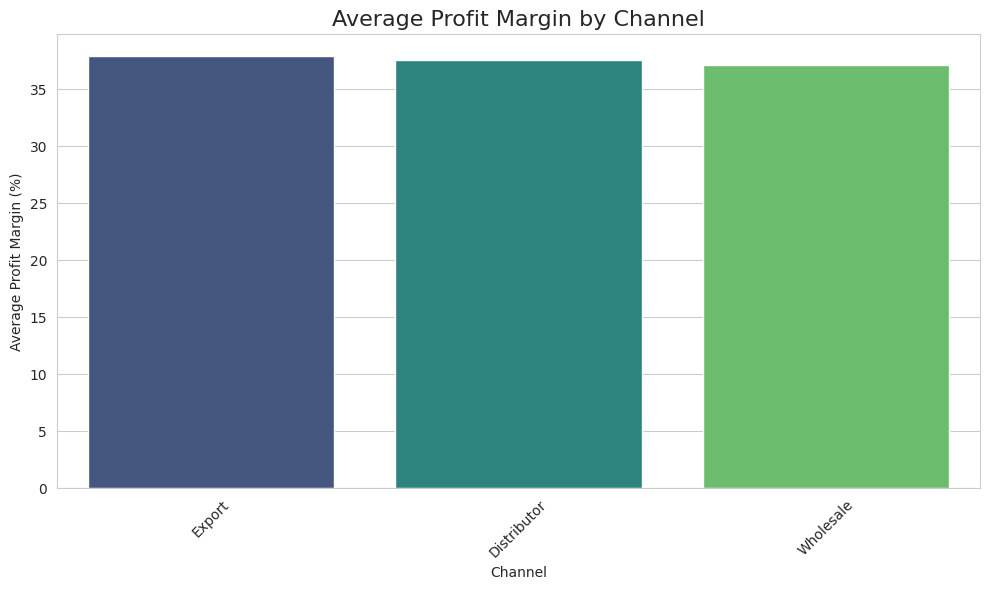

In [ ]:


# Group by channel and calculate average profit margin
channel_profit_margin = (
    df.groupby("channel")["profit_margin_pct"]
      .mean()
      .reset_index()
      .sort_values("profit_margin_pct", ascending=False)
)

print(channel_profit_margin)  # To see exact numbers

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_profit_margin, x="channel", y="profit_margin_pct", palette="viridis")
plt.title("Average Profit Margin by Channel", fontsize=16)
plt.xlabel("Channel")
plt.ylabel("Average Profit Margin (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Customers by Revenue:
     customer_name_index     revenue
99                   100  12161136.5
44                    45  11851757.3
40                    41  10652242.9
79                    80  10420731.1
105                  106  10390447.1
108                  109  10231851.4
52                    53  10225345.7
41                    42   9852664.9
72                    73   9697888.2
145                  146   9569080.7

Bottom 10 Customers by Revenue:
     customer_name_index    revenue
123                  124  4902711.6
136                  137  4889385.3
158                  159  4818867.8
154                  155  4804516.4
169                  170  4710100.0
115                  116  4639877.3
10                    11  4530908.5
36                    37  4443795.1
91                    92  4224048.5
171                  172  3904813.6


/tmp/ipython-input-194835605.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_customers, x="customer_name_index", y="revenue", palette="Blues_r")


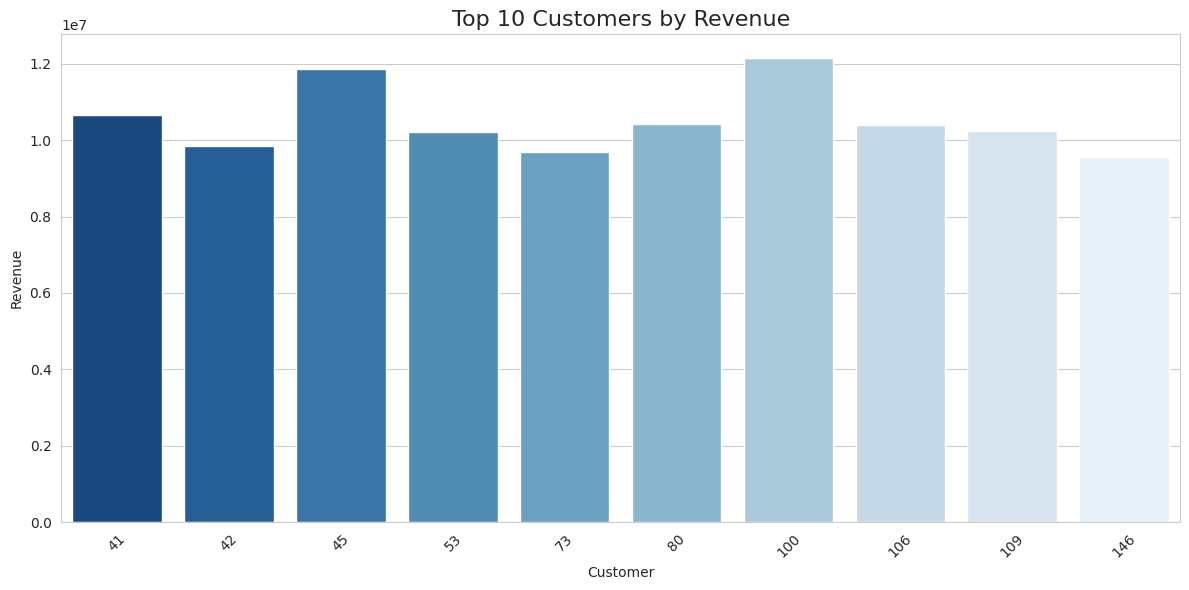

/tmp/ipython-input-194835605.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10_customers, x="customer_name_index", y="revenue", palette="Reds")


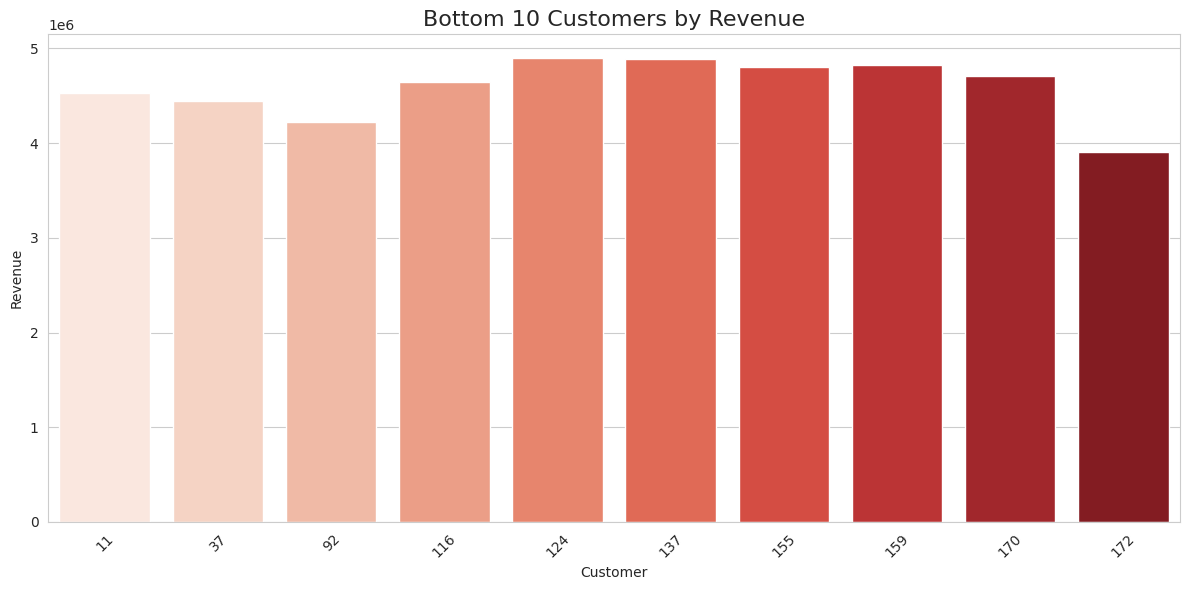

In [ ]:


# Group by customer and calculate total revenue
customer_revenue = (
    df.groupby("customer_name_index")["revenue"]
      .sum()
      .reset_index()
      .sort_values("revenue", ascending=False)
)

# Top 10 customers
top10_customers = customer_revenue.head(10)

# Bottom 10 customers
bottom10_customers = customer_revenue.tail(10)

print("Top 10 Customers by Revenue:")
print(top10_customers)

print("\nBottom 10 Customers by Revenue:")
print(bottom10_customers)

# ---- Plot Top 10 Customers ----
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_customers, x="customer_name_index", y="revenue", palette="Blues_r")
plt.title("Top 10 Customers by Revenue", fontsize=16)
plt.xlabel("Customer")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---- Plot Bottom 10 Customers ----
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom10_customers, x="customer_name_index", y="revenue", palette="Reds")
plt.title("Bottom 10 Customers by Revenue", fontsize=16)
plt.xlabel("Customer")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


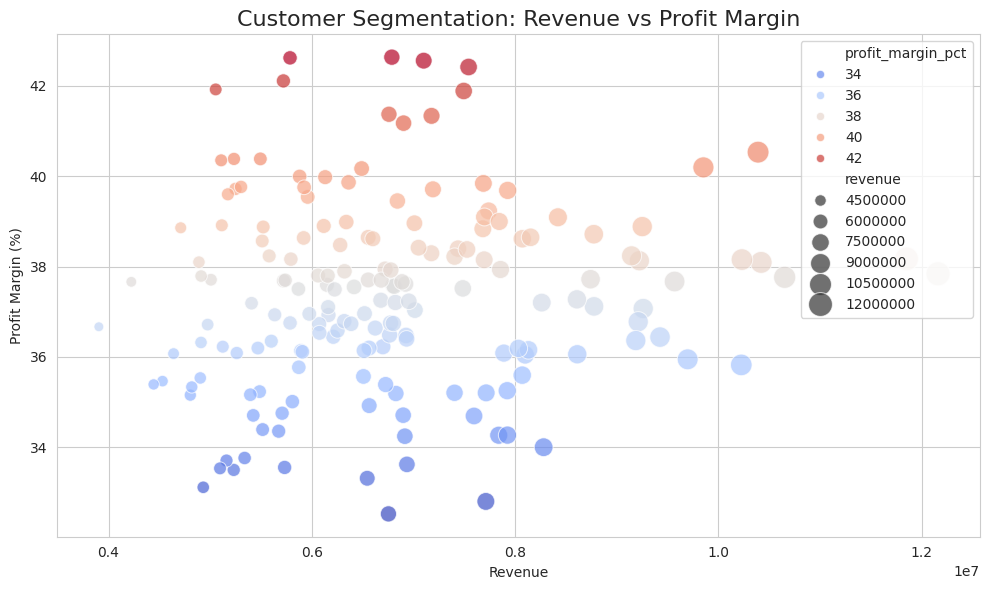

In [ ]:


# Aggregate revenue and profit margin per customer
customer_segmentation = (
    df.groupby("customer_name_index")
      .agg({
          "revenue": "sum",
          "profit_margin_pct": "mean"
      })
      .reset_index()
)

# Scatterplot for segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_segmentation,
    x="revenue",
    y="profit_margin_pct",
    hue="profit_margin_pct",
    palette="coolwarm",
    size="revenue",
    sizes=(50, 300),
    alpha=0.7
)
plt.title("Customer Segmentation: Revenue vs Profit Margin", fontsize=16)
plt.xlabel("Revenue")
plt.ylabel("Profit Margin (%)")
plt.tight_layout()
plt.show()


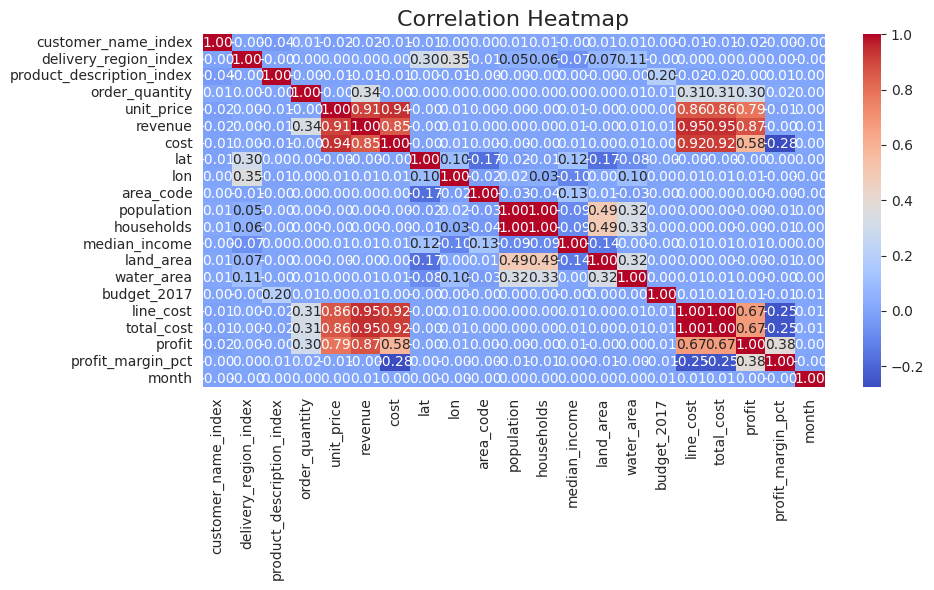

In [ ]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=["number"])

# Correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()
